In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from gensim import corpora, models, similarities
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

/anaconda2/lib/python2.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [3]:
df = pd.read_csv('planecrashlatest.csv')

In [4]:
df.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,c 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [5]:
df.summary[0]


'During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.'

In [6]:
 

text_data = df['summary'].dropna()
text_data = pd.DataFrame(text_data)



In [7]:
text_data

,summary
0,"During a demonstration flight, a U.S. Army fly..."
1,Eugene Lefebvre was the first pilot to ever be...
2,First U.S. dirigible Akron exploded just offsh...
3,The first fatal airplane accident in Canada oc...
4,The airship flew into a thunderstorm and encou...
5,Hydrogen gas which was being vented was sucked...
6,Crashed into trees while attempting to land af...
7,"Exploded and burned near Neuwerk Island, when..."
8,"Crashed near the Black Sea, cause unknown."
9,Shot down by British aircraft crashing in flames.


In [8]:


documents = list(text_data['summary'])
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)



In [9]:


true_k = 4
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
print ('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print('Cluster %d:' % i)
    for ind in order_centroids[i, :10]:
        print ('%s' % terms[ind]),
    print

Most Common Terms per Cluster:
Cluster 0:
en route crashed mountain disappeared plane cargo weather flight conditions
Cluster 1:
cargo attempting plane land crashed runway struck landing airport engine
Cluster 2:
approach runway short crashed aircraft crew pilot landing final plane
Cluster 3:
crashed aircraft plane engine flight taking takeoff pilot mountain failure


In [11]:
vectorizer=CountVectorizer(stop_words='english')
data_corpus=list(text_data['summary'])
vocabulary=vectorizer.fit(data_corpus)
X= vectorizer.transform(data_corpus)


In [12]:
true_k = 6
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(X)
y_kmeans = model.predict(X)

In [13]:
print ('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print('Cluster %d:' % i)
    for ind in order_centroids[i, :10]:
        print ('%s' % terms[ind]),
    print

Most Common Terms per Cluster:
Cluster 0:
plane crashed cargo aircraft pilot runway airport taking landing crew
Cluster 1:
aircraft pilot flight crashed approach crew runway plane failure altitude
Cluster 2:
runway crew aircraft flight approach left power generator feet engine
Cluster 3:
fuel denver plane aircraft pilot right unmarked dive tank handle
Cluster 4:
engine aircraft failure crashed plane pilot left landing power loss
Cluster 5:
crashed aircraft pilot flight mountain approach weather route runway taking


# Word2Vec - Kmeans

In [14]:
tweet = df.summary

In [15]:
tweet=list(tweet)

In [19]:
corpus=[]
for i in range(len(tweet)):
    temp=[]
    if type(tweet[i])!=float:
        for j in tweet[i].split(' '):
            try:
                print(int(j))
            except:
                try:
                    if j not in stopwords.words('english'):
                        j= ps.stem(j)
                        temp.append(j.lower())
                except:
                    temp.append(j.lower())
        corpus.append(temp)
                

75
20
500
15
500
40
2
400
18
45
10
18
400
500
10
800
12


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # Remove the CWD from sys.path while we load stuff.


300
200
3
30
8
60
500
150
10
50
300
700
500
8
10
45
500
60
700
9
20
11
10
50
15
11
450
100
130
2
20
8
3
15
50
43
5
13
23
20
50
17
15
4
2
50
100
20
8
600
10
12
60
200
27
50
582
53
10
14
285
1
50
100
9
3
40
6
300
60
10
5
15
3
1
40
113
20
3
4
32
15
150
2
622
1655
830
3
90
5
35
35
12
2
100
30
300
70
60
4207183
16
39
50
4
3
15
65
10
50
7
50
2
45
300
8
3
12
20
10
4
40
100
32
2
200
5
150
60
50
1
10
5
20
1
20
40
1
5
40
24
71
22
800
500
23
70
360
15
3
30
11
1
14
1
1
80
2
63
120
150
30
2
100
25
12
40
150
9
1994
10
100
8
1
2
2
2
53
150
350
2
4
25
4
3
3
3
1980
4
3
3
3
2
30
8
3
10
50
15
50
340
3
70
50
5
500
800
50
3
14
500
20
300
70
7
50
100
12
300
4
32
39
32
400
5
700
50
750
700
30
15
27
3
22
300
60
30
2
2
600
90
300
674
3
14
60
1
1
2
15
15
8
15
40
6
14
20
1
4
4
6
30
19
30
44
40
28
300
8
4
300
19
400
400
80
400
400
80
150
30
15
30
2
3
3
3
3
3
200
100
200
753
801
815
30
2
50
5
1
30
60
340
10
2
450
23
8
6
1
1000
54
15
225
240
2
3
4
20
170
3
10
200
117
10
15
1
1
3
6
3
4
3
18
70
3
3
40
887
2
15
5
10
1

In [27]:
for i in range(len(corpus)):
    temp=[]
    for j in range(len(corpus[i])):
        try:
            temp.append(corpus[i][j].encode('utf-8'))
        except:
            temp.append(corpus[i][j])
    corpus[i]=temp

In [28]:
corpus

[['dure',
  'demonstr',
  'flight,',
  'u.s.',
  'armi',
  'flyer',
  'flown',
  'orvil',
  'wright',
  'nose-div',
  'ground',
  'height',
  'approxim',
  'feet,',
  'kill',
  'lt.',
  'thoma',
  'e.',
  'selfridge,',
  '26,',
  'passenger.',
  'thi',
  'first',
  'record',
  'airplan',
  'fatal',
  'history.',
  '',
  'one',
  'two',
  'propel',
  'separ',
  'flight,',
  'tear',
  'loos',
  'wire',
  'brace',
  'rudder',
  'caus',
  'loss',
  'control',
  'aircraft.',
  '',
  'orvil',
  'wright',
  'suffer',
  'broken',
  'ribs,',
  'pelvi',
  'leg.',
  '',
  'selfridg',
  'suffer',
  'crush',
  'skull',
  'die',
  'short',
  'time',
  'later.'],
 ['eugen',
  'lefebvr',
  'first',
  'pilot',
  'ever',
  'kill',
  'air',
  'accident,',
  'control',
  'jamb',
  'fli',
  'air',
  'show.'],
 ['first',
  'u.s.',
  'dirig',
  'akron',
  'explod',
  'offshor',
  'altitud',
  '1,000',
  'ft.',
  'test',
  'flight.'],
 ['the',
  'first',
  'fatal',
  'airplan',
  'accid',
  'canada',
  'occur

In [29]:
from gensim.models import Word2Vec

In [30]:
model = Word2Vec(corpus, size=2, window=5, min_count=1, workers=4)

model2 = Word2Vec(corpus, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  

In [31]:
len(model[model.wv.vocab])==len(model.wv.vocab)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


True

In [32]:
points=model[model.wv.vocab]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [33]:
XX=pd.DataFrame(data=points , index=model.wv.vocab , columns=['x','y'])

In [34]:
XX

,x,y
,1.861817,7.293888
elevation.,-0.193781,-0.117113
melosa,0.086853,-0.117561
"1,800",0.090951,0.087224
woodi,0.153568,0.131540
toisa,0.017055,-0.079925
"portugal,",-0.076773,-0.164379
four,0.770474,3.496550
luxair.,-0.012271,0.046587
"ocean,",0.220885,0.772044


In [35]:
import matplotlib.pyplot as plt

'm\xc3\xa1laga.'

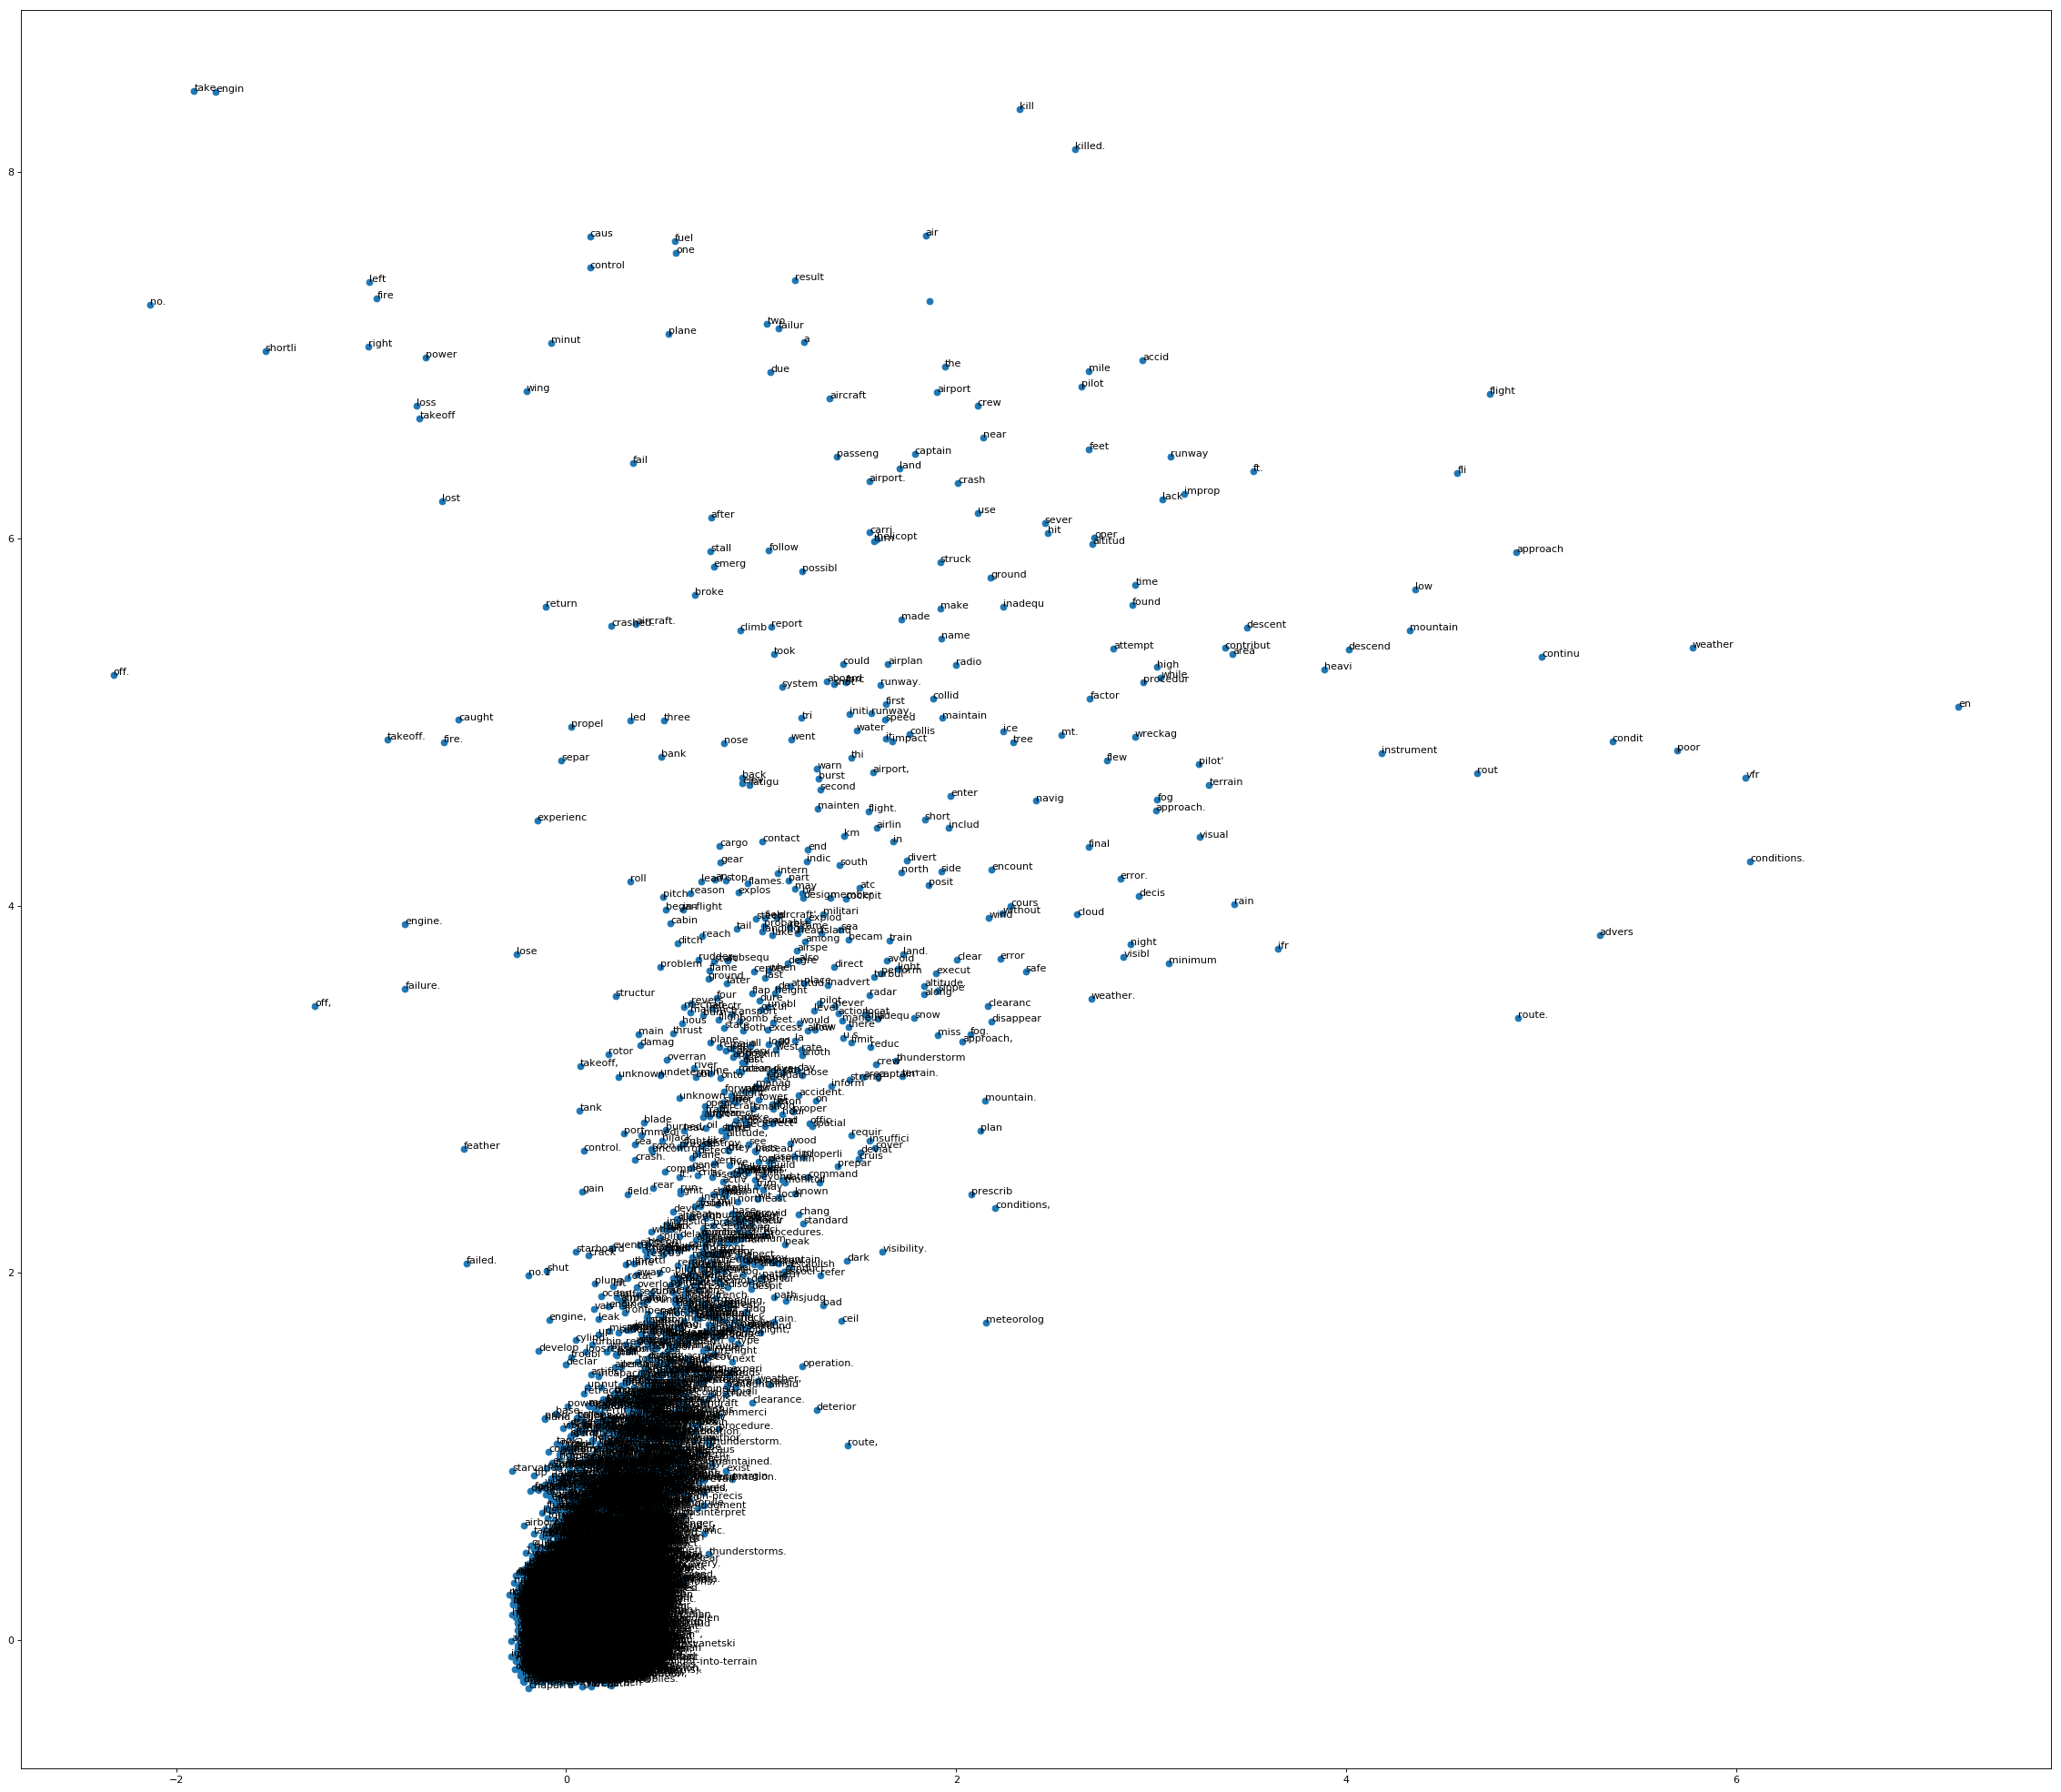

In [40]:
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(XX['x'], XX['y'])
for word, pos in XX.iterrows():
    try:
        ax.annotate(word.encode('utf-8'), pos)
    except:
        kk=0

In [41]:
true_k = 6
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(XX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(points, assign_clusters=True)
print (assigned_clusters)

[2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 

In [49]:
col=[]
for i in assigned_clusters:
    if i==0:
        col.append('red')
    if i==1:
        col.append('blue')
    if i==2:
        col.append('green')

[[0.         6.03140344 3.32374534 6.2357011  1.38853084 0.33041765]
 [1.38853084 4.67034805 1.93525514 4.9156736  0.         1.05903048]
 [6.2357011  2.76702672 3.18553866 0.         4.9156736  5.92567735]
 [3.32374534 2.8113772  0.         3.18553866 1.93525514 2.99397108]
 [0.33041765 5.7030962  2.99397108 5.92567735 1.05903048 0.        ]
 [6.03140344 0.         2.8113772  2.76702672 4.67034805 5.7030962 ]]


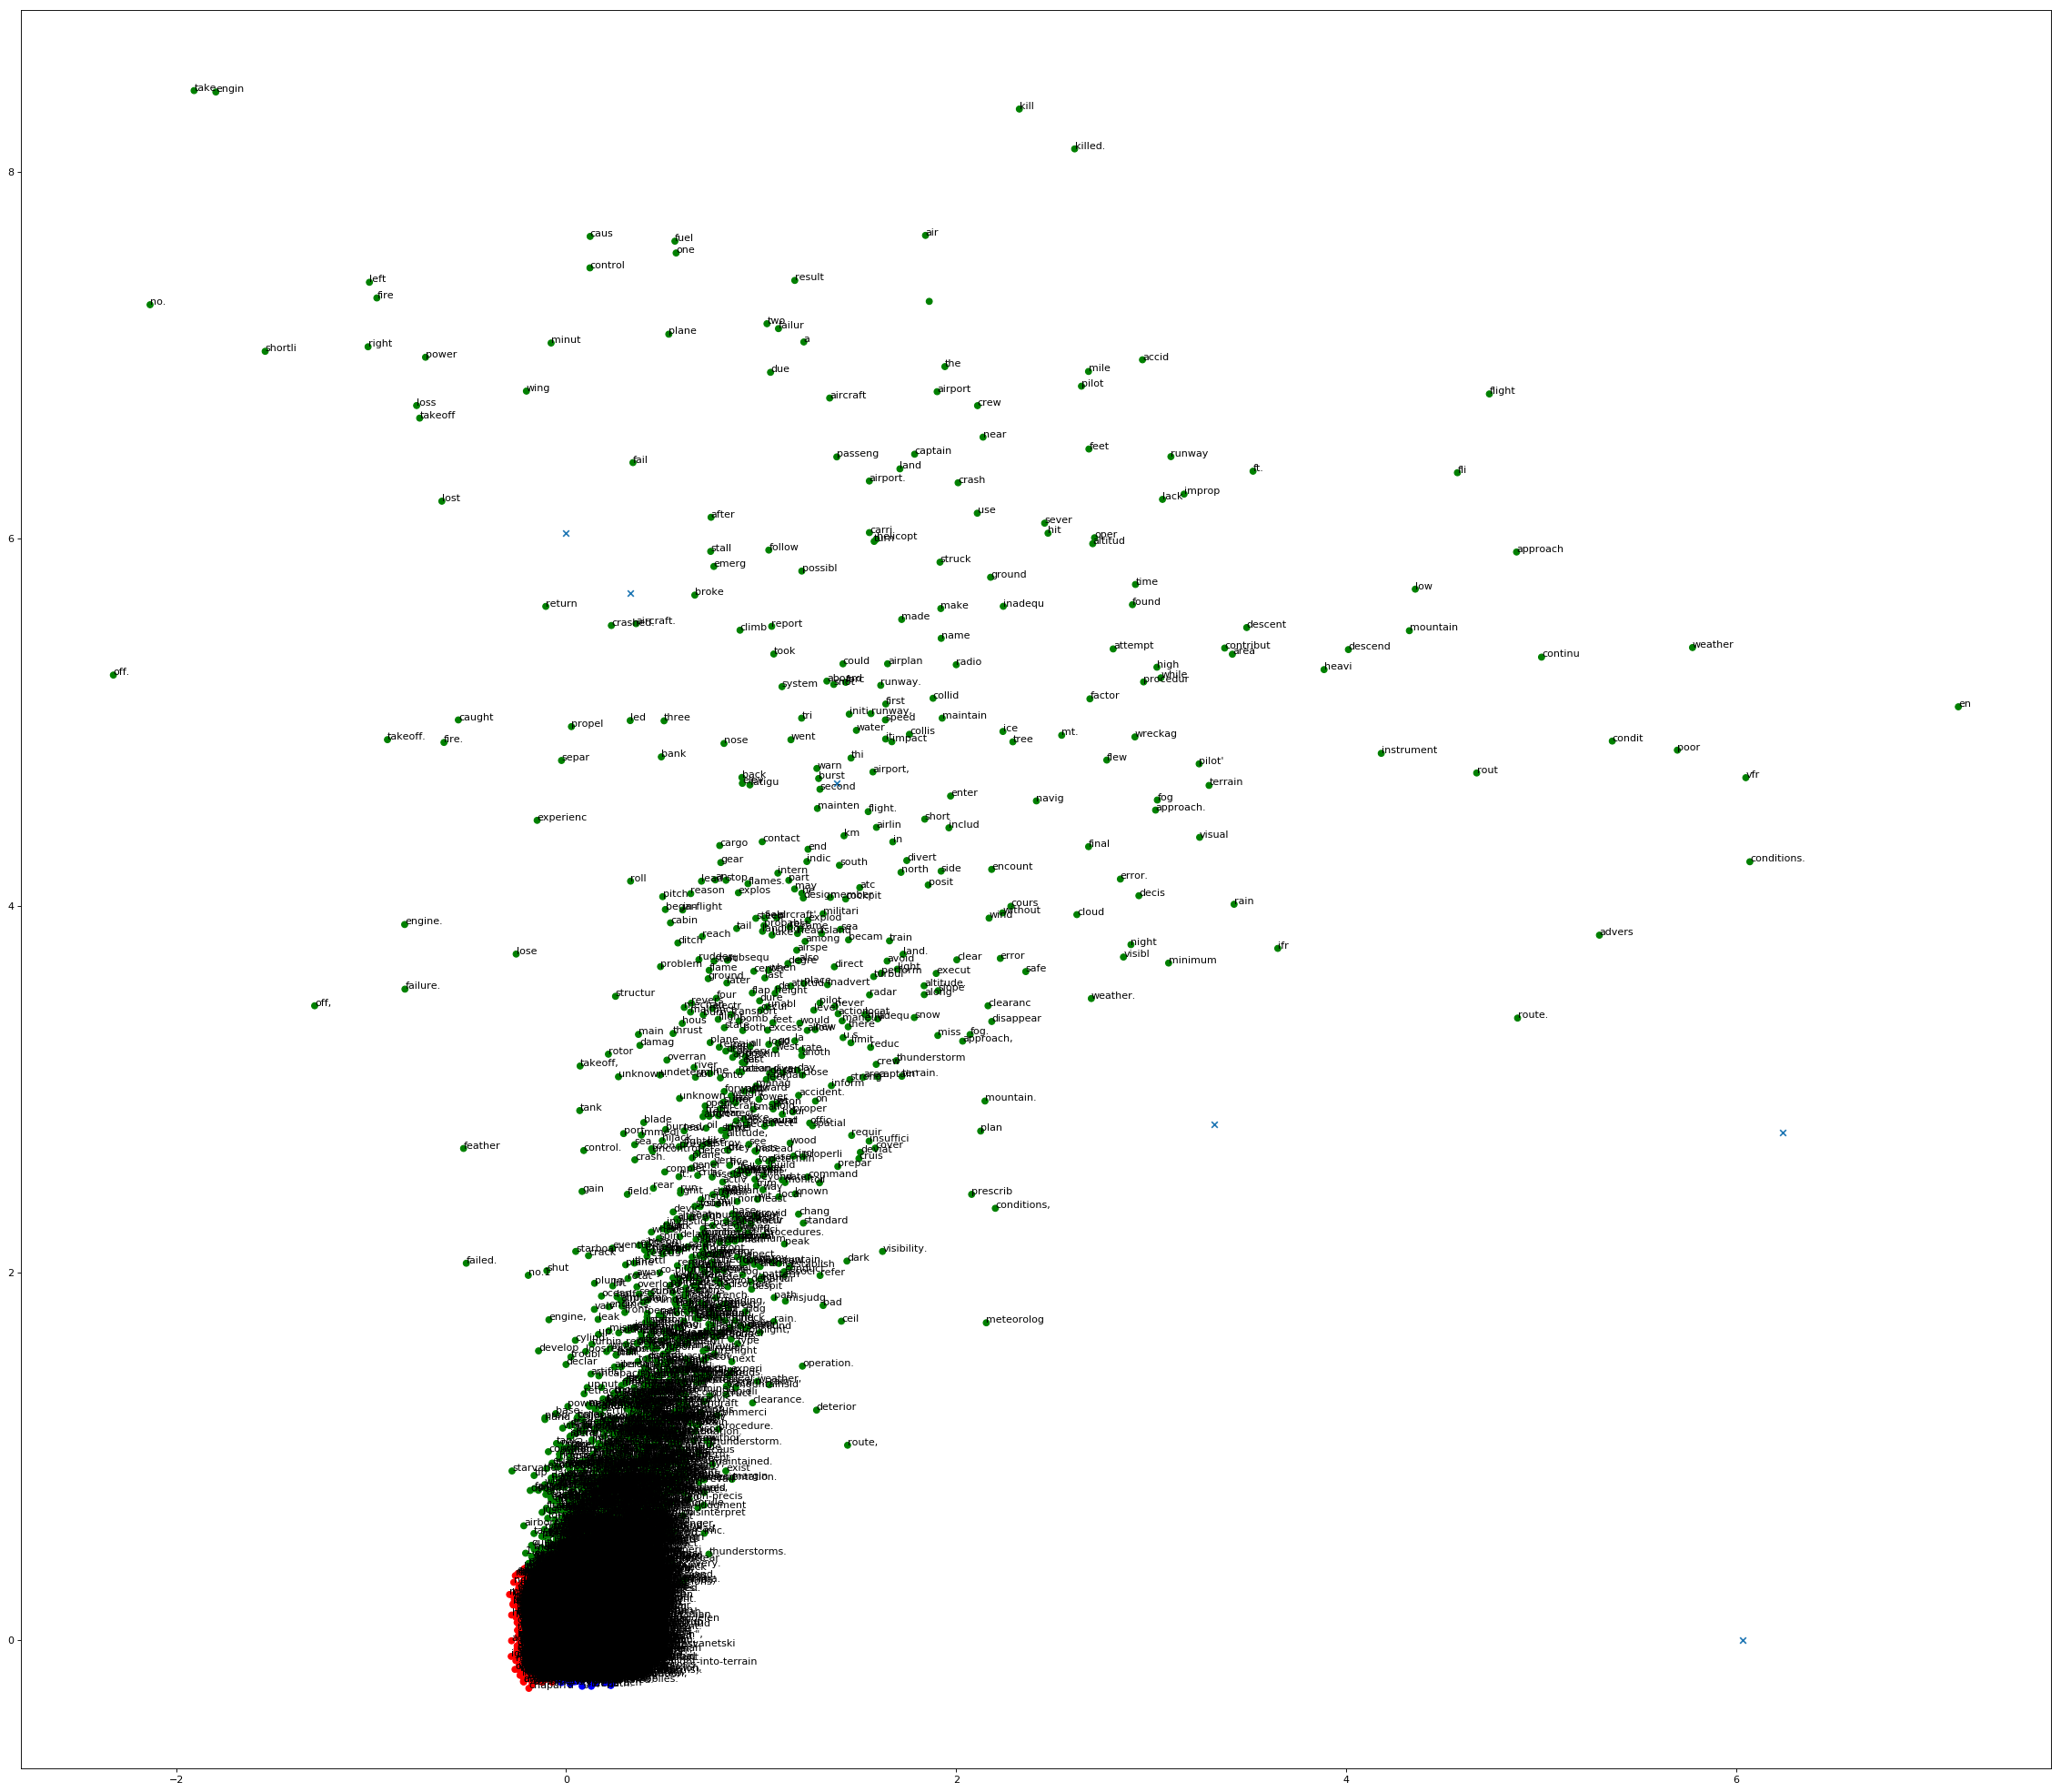

In [50]:

fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(XX['x'], XX['y'],c=col)
ax.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
for word, pos in XX.iterrows():
    try:
        ax.annotate(word.encode('utf-8'), pos)
    except:
        kk=0

In [ ]:
data

In [96]:
print (model.most_similar(positive=['crash'], negative=[], topn=10))

[('cleared.', 1.0), ('hangar.', 1.0), ('criclklewood', 1.0), ('sabrejet', 0.9999999403953552), ('icing,', 0.9999999403953552), ("roosevelt'", 0.9999999403953552), ('prestwick', 0.9999998807907104), ('cathedr', 0.9999998211860657), ('checklist,', 0.9999997615814209), ('someth', 0.9999997615814209)]


C:\Users\denia\Anaconda3\envs\Deni\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [103]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

dure:0
demonstr:0
flight,:0
u.s.:0
armi:0
flyer:0
flown:0
orvil:1
wright:0
nose-div:0
ground:0
height:0
approxim:0
feet,:0
kill:0
lt.:0
thoma:0
e.:0
selfridge,:2
26,:0
passenger.:0
thi:0
first:0
record:0
airplan:0
fatal:0
history.:0
:0
one:0
two:0
propel:0
separ:0
tear:0
loos:0
wire:0
brace:2
rudder:0
caus:0
loss:0
control:0
aircraft.:0
suffer:0
broken:0
ribs,:0
pelvi:0
leg.:1
selfridg:0
crush:0
skull:0
die:0
short:0
time:0
later.:0
eugen:1
lefebvr:2
pilot:0
ever:0
air:0
accident,:0
jamb:0
fli:0
show.:1
dirig:2
akron:1
explod:0
offshor:0
altitud:0
1,000:0
ft.:0
test:0
flight.:0
the:0
accid:0
canada:0
occur:0
american:0
barnstormer,:1
john:0
m.:0
bryant,:0
california:0
aviat:0
killed.:0
airship:0
flew:0
thunderstorm:0
encount:0
sever:0
downdraft:0
crash:0
mile:0
north:0
helgoland:1
island:0
sea.:0
ship:0
broke:0
car:0
immedi:0
sank:0
drown:0
occupants.:1
hydrogen:0
ga:0
vent:0
suck:0
forward:0
engin:0
ignit:0
burn:0
3,000:0
ft..:0
tree:0
attempt:0
land:0
shot:0
british:0
french:0
near:0

04:00:0
gct.:0
hijack:0
japanes:0
truk:0
murdered.:1
"hawaii:2
hungarian:2
journalists.:0
chichijima:1
hurricane.:2
forest:0
later..:0
guanabara:0
looping.:1
hong:0
kong:0
chungking,:2
militari:0
fighters.:0
kweilin.:1
rebuilt:0
military.:1
plane.:0
suburb:2
tokyo.:0
trainer:0
/passeng:0
tucumcari:2
excess:0
vibrat:0
power,:0
engine,:0
consult:2
sustain:0
cane:0
runwa:0
swerv:0
tractor.:2
alps,:0
disappeared.:0
search:0
occup:0
debri:0
later,:0
pizzo:1
cengalo:1
border:0
some:0
post:0
office.:1
broken,:1
daodenong:0
allow:0
side-slip:0
contol.:0
school:0
soesterberg.:2
regina:1
palm:0
doubl:0
ramadi:1
sandstorm.:1
less:0
offshore.:0
standard:0
intersect:0
compani:0
dispatchers,:1
charg:0
respons:0
properli:0
safeguard:1
author:0
china:0
whle:2
schiphol:0
imperi:2
qantas.:0
overcast.:1
winds,:0
chamb:2
janerio.:0
2,650:2
past:0
boundri:2
consider:0
developed,:1
gasolin:0
cross-fe:0
valve.:0
exact:0
origin:0
katherin:0
ditched,:0
ocean,:0
se:0
york.:2
complet:0
inner:0
carburetor:0
"cava

impetu:1
woodi:2
guthri:0
"deportee.":2
bermuda,:2
azor:1
bermuda.:0
tiger.":0
purser.th:2
stress:0
induc:0
malfunctioning.:1
ulrichstein,:0
frankfurt:0
florenc:1
rome:0
base.:0
level,:0
ste.:1
mere:2
l'eglis:0
shower:0
harvre.:0
mati.:1
land.th:1
brazilian:0
depend:0
lion:2
built.:1
skalafel:0
hellisheioi:0
longitudin:0
shanghai:0
sanford:2
anchorage,:1
alaska.:0
aurora:1
boreali:1
cristais.:0
alto:1
arrastradero:1
bogota.:0
7,800:2
gatow:2
yakovlev:2
fighter,:2
aerobatics.:0
total:0
vicker:0
vike:1
yak:0
fighter':2
rule:0
flying.:0
shannon:1
2,380:1
apart:0
fluoresc:2
cause.:0
"clipper:0
empress:1
skies.":0
whereupon:2
markham:0
situation.:0
ici:0
drink:2
kathleen:0
cavendish,:0
28,:0
sister:0
forest.:0
spitzkop:2
"miss:0
france.":2
carry-in:0
beneath:0
fin,:0
prepatori:0
marchekanskoy:0
erin:2
suffieci:1
hold.:0
carbon:0
dioxid:0
extinguish:2
warning.:0
dioxide,:0
heavier:2
asphyxi:0
voltag:0
10/24/47:0
11/11/47,:0
installed.:0
earl:2
carroll,:0
theatric:0
impresario:0
dougla:0
knew

ice-protect:0
flame-out:0
batteri:0
energy,:0
unfeath:0
relight:0
wind-milling.:0
multipl:0
interrupt:0
auto-feath:1
advanc:0
energy.:0
relit:2
istanbul:0
ankara,:0
turkey:0
esenboga:0
ft,:0
ankara:1
"orm:1
viking.":0
unqualifi:2
few:2
huanacota,:2
injuries.investig:1
exploding.:0
r-6d.:1
(u:2
pilot).:0
usn:0
disobey:0
disagre:2
r4-d6.:0
threshold.:0
self:0
nagoya.:1
whirl:2
stiff:1
entri:0
factors.:0
9/29/59.:2
available.:2
intermitt:0
propellers,:0
brake:0
experience.:1
over-tak:0
f-27:1
appoach.:2
fairchild.:1
prescribed.:2
hand-grenad:1
immigrant.:2
disarm:0
marra.:1
astrofix:0
estim:0
arrang:2
carriag:0
livestock.:2
11/21/61.:2
organ:0
overse:2
9,646:0
cordova.:1
radar,:2
artcc:2
seam:1
degrad:0
adhesive.:1
pichincha:1
quito.:2
bulkhead,:1
separated.:0
3hrs,:0
serv:2
remaind:2
contamination,:1
supply,:2
fire-in-flight,:1
danish:1
association.:0
daniish:2
crosswinds.:1
wiper:0
kivu:0
cemetery.:0
5,000ft,:1
hayti:2
casablanca:2
4.engin:1
ineffect:0
strike.:0
belaya:1
no.3:0
governor


the:0
rain/snow.:0
girl,:0
3,:0
wires/pol:0
ligurian:2
pisa:1
giusto:0
padang.:0
kong.:0
lowland:2
femal:0
teenager,:0
trek:0
days.:0
koepck:0
collarbon:0
miracul:0
to,:2
vain:1
mother.:0
koepcke,:1
peruvian:0
ornithologist,:0
success.:0
herself.:0
wade:0
knee-high:0
swarm:2
leeches.:2
ninth:1
shelter.:0
then:0
waited.:0
lumbermen:2
her.:0
eat:0
refused.:0
egg:2
hatch.:0
count:0
worm:0
alone.":1
journey:0
civilization;:0
slept:0
lumber:2
wires.:0
adana:0
downwind:0
non-schedul:0
bogota:0
attendant,:2
vesna:0
vulovic,:0
33,330:2
paralyz:2
waist:2
coma:0
croatian:1
extremist:1
group.:0
1997,:1
vulov:0
crash-sit:2
reunit:1
firemen:0
hypoxia.:0
emphysema:2
arteriosclerosis.:1
t-37:0
two-famili:2
e:0
dubai.:1
outdat:1
shamsam:2
surface-to-air:0
missile.:0
janeiro,:2
reassembl:0
stipul:0
lunga:2
palermo.:0
non-adher:0
pigafetta.:2
research.:0
didn’t:0
barometr:0
shorelin:0
couldn’t:0
kindergarten,:0
adults.:0
an-24.:2
secured,:0
grips.:0
trucks,:0
settle.:0
dc-10.:2
vortex:0
preced:0
"heavy

flew,:2
solid:1
granit:0
3,750:0
liter:0
pulver:0
granite.:2
neg:2
inaccurate.:1
f-16:0
commut:0
merril:0
latest:1
weld:2
uncontain:0
decompression,:2
tadeusz:1
kosciuszko.:1
skin.:0
radiograph:0
mandatori:0
non-destruct:0
interpreted.:2
hvy,:1
plt:2
arc:0
ruteng.:1
jerach:1
8,200:1
heho.:1
ugu:2
baguio.:2
soldier.:1
itali:0
cointrin:0
switzerland:1
refuel,:1
restaur:2
metropolitan:0
wayn:0
obstical:2
rental:0
agency.:0
4-year-old:0
cichan,:0
nuisanc:2
alarms.cecelia:0
earn:1
annual:0
memori:0
tragic:0
victims’:0
love:0
ones.:1
stick:0
shaker:0
nyaung-u:2
fl147,:0
indianapoli:2
flameout:2
indianapolis.:0
ft,.:0
ft.':2
7-stori:0
ramada:2
inn.:2
lobby,:1
thousand:1
hotel':0
lobbi:2
(a:0
10th:2
later).:2
gasket:1
performance,:0
uncertain.:2
achieved.:0
de-icing.:0
overrot:0
jobs.:1
mauritiu:2
mauritius.:0
pallet:1
deck:0
(1):0
crew;:0
(2):0
smoke;:0
(3):0
distraction;:2
(4):0
structure,:1
break-up;:0
(5):0
;:0
(6):1
substance,:0
manifest,:0
illig:0
abu:0
dhabi:0
bangkok.:0
dhabi.:1
fake:2

behind.:0
pedal:0
gauge.:1
enabl:0
self-induc:0
vladivostok,:0
compressors.:1
aid.:2
autofeathered.:2
acccident.:1
mackenzie.:0
williston:1
low-level,:2
olympu:2
salonica,:2
c-130:2
search,:1
pastra:0
screen:0
musi:0
brand-new,:0
sumatran:2
indonesian:0
committe:2
jet':0
dissent:0
juri:0
hardover.:1
aerosweet:2
yak-42:0
310,:1
returned,:2
affair.:0
kandahar:2
herat:2
quetta:2
khojak:2
fuel.":1
brno.:1
tacloban:0
cagayan:2
oro.:2
cagay:1
pagalungan,:0
"level:2
sir.":2
dozen:0
gondola:1
hoyo:0
sobat:2
taipei':0
neighborhood,:0
dfdr:1
temperatures,:0
1.6:1
hsinchu,:2
hsinchu.:2
kabul:0
sharhi:0
baranta:1
6,888:1
karaok:2
market.:0
(legally):2
deactivated.:1
mid-runway:2
strand:2
piura:1
shantytown:1
tame,:0
bogota':2
airlines.:2
romeo:0
non-direct:0
angeles-bas:0
occident:1
petroleum:1
swampi:1
andoas.:0
1,800m,:2
high-tens:1
incom:2
wire.:0
2,800m,:2
erdenet.:1
montreal':2
peterborough:0
dorval.:1
mirabel:0
final,:1
upwards.:2
brakes':0
dragging,:0
leakage,:0
components,:0
ovht:2
correct

injuries..:2
airl:2
kaimana:1
apollo:0
two-memb:0
petrozavodsk:1
accident::1
runway':1
subordin:1
exclud:0
decisions.:0
bagram.:0
bangoka:0
strezhevoy:2
orb:2
revol:0
requalif:1
exam.:0
boa:2
viagem:0
guelmim:1
jeju:2
thirty-eight:2
rocket-propel:0
overnight:0
taliban:2
magdan:1
magdan,:0
miel:1
omsukchan,:0
mcgrath:2
pieces.th:1
mosbi:0
1.7:0
north-northeast:0
midwest:0
occasions,:0
kilometr:1
(1,100:2
yd):0
camiroaga,:2
huambo:0
slave:0
façade.:0
come.:2
everest:0
kathmandu-tribhuvan:2
medan.:0
bohorok,:2
enroute,:0
lutsek':2
madang,:2
gogol:0
madang.:2
paseng:0
propellers.:2
unserviceable.:0
'quit:1
quickly'.:2
over-sp:0
over-speed:0
back-drov:0
(instead:2
propellers):0
engine.aft:1
began,:0
over-speed.:1
detail:0
handbook.:1
xakanaka:0
okavango:2
delta.:0
26l.:0
fenestron:1
vegetation.:1
meters. th:1
josé:0
blake:0
mora:0
patient':1
engi9n:0
illicit:0
hoover:0
dam,:0
mead:0
henderson.say:0
hardwar:0
disconnected,:0
tini:0
scene.:0
reus:1
fore/aft:1
air-taxi:2
blizzard:1
namoya.:2
b

In [104]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[0 2 2 ... 2 2 2]
Centroids data
[[0.00119617 0.06519139 0.00059809 ... 0.00119617 0.         0.00059809]
 [0.005      0.11166667 0.         ... 0.00666667 0.00166667 0.        ]
 [0.00059119 0.02571682 0.         ... 0.0002956  0.         0.        ]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-120729.89800655919
Silhouette_score: 
0.06327250831568391
